In [ ]:
import pandas as pd

model_1_data = pd.read_csv('model_1_data.csv')


### Model 1 Training Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

features = ['weighted_xG_EV_percentage', 'weighted_save_percentage', 'weighted_shooting_percentage']
X = model_1_data[features]  # Replace with actual column names
y = model_1_data.iloc[:, -1]   # The last column (win)

In [ ]:


# Define the model
model = GradientBoostingClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [1,2,3,5,7,9,11,13],
    'learning_rate': [0.01, 0.05, 0.1,0.5,1],
    'max_depth': [1,23, 5, 7]
}

# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='neg_log_loss', cv=5)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Log Loss: {-grid_search.best_score_}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 13}
Best Log Loss: 0.6530256952802205


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Validation and Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Instantiate the model with the best parameters
best_model_1 = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=1,
    n_estimators=13
)

# Fit the model on the entire dataset
best_model_1.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=13)

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate the final model
cv_scores = cross_val_score(best_model_1, X, y, cv=5, scoring='neg_log_loss')
print(f"Log Loss for each fold: {-cv_scores}")
print(f"Mean Log Loss: {-cv_scores.mean()}")


Log Loss for each fold: [0.61680593 0.66309918 0.67244233 0.68970786 0.62307317]
Mean Log Loss: 0.6530256952802205


In [ ]:
# Get feature importances
feature_importances = best_model_1.feature_importances_

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                        Feature  Importance
2  weighted_shooting_percentage    0.738563
1      weighted_save_percentage    0.220394
0     weighted_xG_EV_percentage    0.041043


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_true contains the actual labels and y_pred contains the predicted labels
y_pred = best_model_1.predict(X_test)
y_pred_prob = best_model_1.predict_proba(X_test)[:, 1]  # Replace with predicted labels from the model
# y_true = y  # Actual labels

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.30      0.50      0.37         6
        True       0.62      0.42      0.50        12

    accuracy                           0.44        18
   macro avg       0.46      0.46      0.44        18
weighted avg       0.52      0.44      0.46        18

[[3 3]
 [7 5]]


### Power Ranking @ End Of Season

In [ ]:
stats_team_1 = pd.read_csv('processed_statistics_team_1.csv')
stats_team_2 = pd.read_csv('processed_statistics_team_2.csv')
stats_team_3 = pd.read_csv('processed_statistics_team_3.csv')
stats_team_4 = pd.read_csv('processed_statistics_team_4.csv')
stats_team_5 = pd.read_csv('processed_statistics_team_5.csv')
stats_team_6 = pd.read_csv('processed_statistics_team_6.csv')

In [ ]:
features = ['weighted_xG_EV_percentage', 'weighted_save_percentage', 'weighted_shooting_percentage']

stats_1_refined = stats_team_1[features]
stats_2_refined = stats_team_2[features]
stats_3_refined = stats_team_3[features]
stats_4_refined = stats_team_4[features]
stats_5_refined = stats_team_5[features]
stats_6_refined = stats_team_6[features]

In [ ]:
stats_1_end = stats_1_refined.iloc[-1]
stats_2_end = stats_2_refined.iloc[-1]
stats_3_end = stats_3_refined.iloc[-1]
stats_4_end = stats_4_refined.iloc[-1]
stats_5_end = stats_5_refined.iloc[-1]
stats_6_end = stats_6_refined.iloc[-1]

In [ ]:
# Reshape the single sample into a 2D array
y_pred_1 = best_model_1.predict_proba(stats_1_end.values.reshape(1, -1))[:, 1]
y_pred_2 = best_model_1.predict_proba(stats_2_end.values.reshape(1, -1))[:, 1]
y_pred_3 = best_model_1.predict_proba(stats_3_end.values.reshape(1, -1))[:, 1]
y_pred_4 = best_model_1.predict_proba(stats_4_end.values.reshape(1, -1))[:, 1]
y_pred_5 = best_model_1.predict_proba(stats_5_end.values.reshape(1, -1))[:, 1]
y_pred_6 = best_model_1.predict_proba(stats_6_end.values.reshape(1, -1))[:, 1]


In [ ]:
print(y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6)


[0.45845338] [0.4165888] [0.56193919] [0.45736291] [0.4165888] [0.68367939]


### Meta Model

In [ ]:
meta_model_data = pd.read_csv('meta_model_data.csv')
# Drop the 'weighted_pp_share_percentage' column
meta_model_data = meta_model_data.drop(columns=['weighted_pp_share_percentage', 'weighted_xG_PP_percentage', 'weighted_shots_for_percentage'])


In [ ]:
import pandas as pd
import numpy as np

# Load the meta_model_data CSV
meta_model_data = pd.read_csv('meta_model_data.csv')


meta_model_input_template = pd.DataFrame(columns=['game_date', 'game_id', 'win_prob', 'away_prob', 'home_team_won'])


# Function to calculate win probability based on weighted stats
def calculate_win_probability(row):
    # Example calculation (update this with your actual calculation logic)
    stats = row[['weighted_xG_EV_percentage',
                 'weighted_save_percentage', 'weighted_shooting_percentage']].values.reshape(1, -1)

    # Replace with actual model prediction logic
    # For simplicity, we use a placeholder calculation
    win_probability = best_model_1.predict_proba(stats)[:,1][0]

    return win_probability

# Initialize lists to store results
game_date = []
game_ids = []
home_probs = []
away_probs = []
home_team_won = []

# Loop through each row in the meta_model_data
for _, row in meta_model_data.iterrows():
    game_id = row['game_id']
    is_home_team = row['is_home_team']
    home_team_win = row['home_team_win']
    game_date.append(row['game_date'])

    # Calculate win probability
    win_prob = calculate_win_probability(row)

    # Append results to lists
    game_ids.append(game_id)
    if is_home_team:
        home_probs.append(win_prob)
        away_probs.append(np.nan)  # Not applicable if home team
    else:
        home_probs.append(np.nan)  # Not applicable if away team
        away_probs.append(win_prob)

    if home_team_win:
        home_team_won.append(1)
    else:
        home_team_won.append(0)

# Create the output DataFrame
meta_model_input = pd.DataFrame({
    'game_date': game_date,
    'game_id': game_ids,
    'home_prob': home_probs,
    'away_prob': away_probs,
    'home_team_won': home_team_won
})

# Save to CSV
meta_model_input.to_csv('meta_model_input.csv', index=False)

meta_model_input = meta_model_input.groupby('game_id').agg(
    game_date=('game_date', 'first'),
    home_prob=('home_prob', 'max'),  # max works because one of the two will be NaN
    away_prob=('away_prob', 'max'),
    home_team_won=('home_team_won', 'first')  # take the first value since it's the same for both rows
).reset_index()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming X is your feature matrix and y is your target vector
X = meta_model_input[['home_prob', 'away_prob']]
y = meta_model_input['home_team_won']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import log_loss


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=3)


# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000, C=10)  # You can set max_iter to control the number of iterations
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_val)[:, 1]  # Probabilities of the positive class

# Predict class labels for validation data
y_pred = model.predict(X_val)

# Evaluate using accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Evaluate using log loss
logloss = log_loss(y_val, y_pred_prob)
print(f'Validation Log Loss: {logloss:.4f}')


Validation Accuracy: 0.76
Validation Log Loss: 0.5396


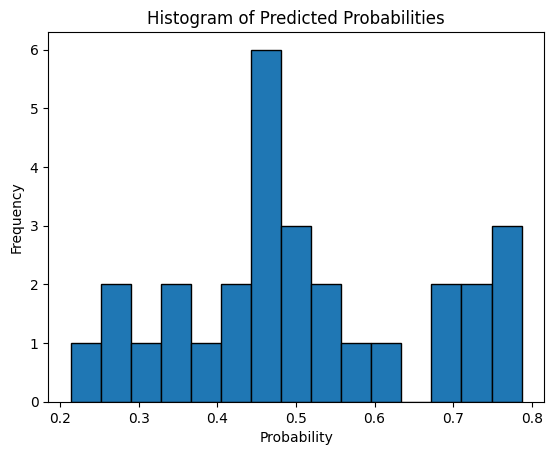

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_pred_prob, bins=15, edgecolor='k')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_val and y_pred are available
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[10  2]
 [ 5 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.86      0.71      0.77        17

    accuracy                           0.76        29
   macro avg       0.76      0.77      0.76        29
weighted avg       0.78      0.76      0.76        29



In [ ]:
coefficients = model.coef_

# If you have feature names, you can pair them with the coefficients
feature_names = X_train.columns  # Assuming X_train is a DataFrame with named columns
coefficients_df = pd.DataFrame(coefficients, columns=feature_names)

print("Coefficients for each feature:")
print(coefficients_df)

Coefficients for each feature:
   home_prob  away_prob
0    4.68461  -3.527219


# Graphing Bins For Win Prediction Percentages

In [ ]:
X = meta_model_input[['home_prob', 'away_prob']]
y = meta_model_input['home_team_won']

In [ ]:
y_predict = model.predict(X)
y_predict_prob = model.predict_proba(X)[:, 1]

In [ ]:
y_predict_prob

array([0.19121266, 0.23744141, 0.23744141, 0.72128578, 0.78687299,
       0.78687299, 0.34468868, 0.21365298, 0.28127023, 0.43718655,
       0.5149112 , 0.21365298, 0.53250481, 0.28020671, 0.69762401,
       0.78507452, 0.46021814, 0.32140614, 0.43107866, 0.73895214,
       0.68998176, 0.45270912, 0.46759895, 0.4300434 , 0.52247247,
       0.46759895, 0.46387098, 0.69065493, 0.43107866, 0.39571736,
       0.53490531, 0.56132747, 0.59951828, 0.52807766, 0.73541865,
       0.4434375 , 0.46610609, 0.28020671, 0.21365298, 0.69065493,
       0.4796781 , 0.55238215, 0.72586905, 0.32140614, 0.60782187,
       0.4796781 , 0.60044141, 0.55238215, 0.51565356, 0.72128578,
       0.51657721, 0.3868833 , 0.42497517, 0.51657721, 0.32140614,
       0.59951828, 0.69934516, 0.59951828, 0.25504702, 0.43718655,
       0.75425373, 0.39022904, 0.51657721, 0.3650398 , 0.3650398 ,
       0.4796781 , 0.69065493, 0.46610609, 0.43202221, 0.75425373,
       0.51530141, 0.46759895])

In [ ]:
df = pd.DataFrame({
    'win_prob': y_predict_prob,
    'win_prob_binary': y_predict,
    'result': y
})

In [ ]:
import pandas as pd

# Define the bins and labels
bins = [0, 0.375, 0.5, 0.625, 1]
labels = ['0 - 37.5', '37.5 - 50', '50 - 62.5', '62.5 - 100']

# Create a new column 'bin' with the assigned bins
df['bin'] = pd.cut(df['win_prob'], bins=bins, labels=labels, include_lowest=True)

# Group by the 'bin' column and calculate the counts
grouped = df.groupby('bin').agg(
    total_games=('win_prob', 'size'),  # Total number of games in each bin
    correct_predictions=('win_prob_binary', lambda x: (x == df.loc[x.index, 'result']).sum())  # Count correct predictions
).reset_index()

# Calculate the accuracy per bin
grouped['accuracy'] = grouped['correct_predictions'] / grouped['total_games']

# Display the result
print(grouped)


          bin  total_games  correct_predictions  accuracy
0    0 - 37.5           16                   15  0.937500
1   37.5 - 50           22                   13  0.590909
2   50 - 62.5           18                   14  0.777778
3  62.5 - 100           16                   14  0.875000


<ipython-input-79-913152371de7>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin').agg(


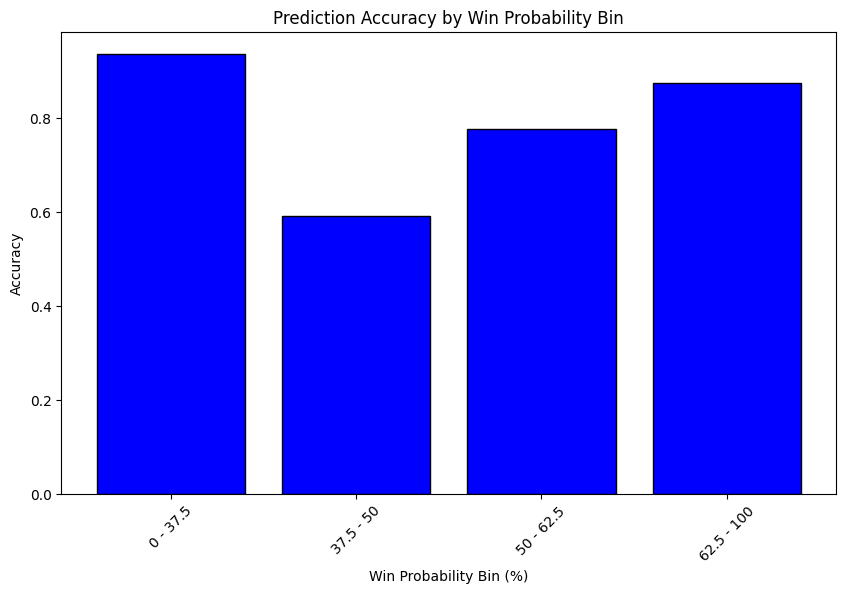

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy per bin
plt.figure(figsize=(10, 6))
plt.bar(grouped['bin'], grouped['accuracy'], color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Win Probability Bin (%)')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy by Win Probability Bin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()
